In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
merged_data = pd.read_csv('merged_dataset.csv')
merged_data.head()

,passenger_count,trip_distance,RatecodeID,payment_type,total_amount,trip_duration,date,PRCP,SNOW,pickup_borough,dropoff_borough,Tavg,tpep_pickup_time,tpep_dropoff_time
0,1,3.79,1.0,1,24.36,20.483333,2022-12-14,0.00,0.0,Manhattan,Manhattan,35.0,08:57:09,09:17:38
1,1,2.08,1.0,1,15.36,10.816667,2022-08-28,0.00,0.0,Manhattan,Manhattan,77.5,13:22:42,13:33:31
2,3,2.08,1.0,1,18.30,17.166667,2022-07-29,0.10,0.0,Manhattan,Manhattan,78.5,18:28:00,18:45:10
3,1,18.24,2.0,1,60.60,28.983333,2022-07-26,0.00,0.0,Queens,Manhattan,76.0,00:01:06,00:30:05
4,2,9.12,1.0,1,41.60,32.916667,2022-04-08,0.03,0.0,Queens,Manhattan,57.0,12:38:17,13:11:12


In [26]:
merged_data.dtypes

passenger_count        int64
trip_distance        float64
RatecodeID           float64
payment_type           int64
total_amount         float64
trip_duration        float64
date                  object
PRCP                 float64
SNOW                 float64
pickup_borough        object
dropoff_borough       object
Tavg                 float64
tpep_pickup_time      object
tpep_dropoff_time     object
dtype: object

c:\Users\varun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


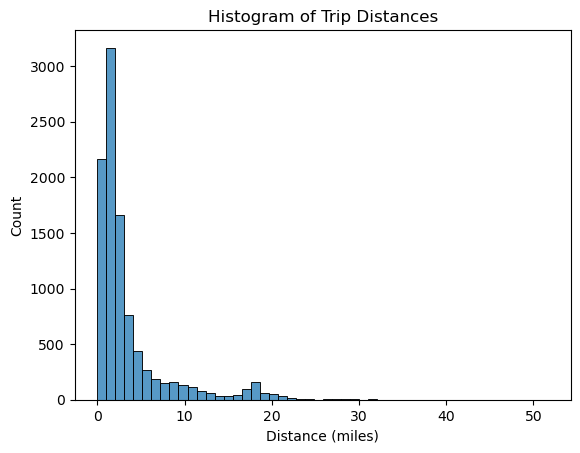

In [20]:
sns.histplot(merged_data['trip_distance'], bins=50)
plt.title('Histogram of Trip Distances')
plt.xlabel('Distance (miles)')
plt.ylabel('Count')
plt.show()

In [27]:
merged_data['date'] = pd.to_datetime(merged_data['date'])

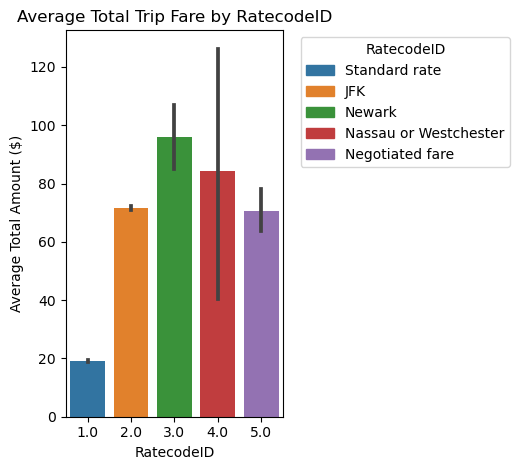

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define a dictionary for RatecodeID labels for the legend
ratecode_labels = {
    '1.0': 'Standard rate',
    '2.0': 'JFK',
    '3.0': 'Newark',
    '4.0': 'Nassau or Westchester',
    '5.0': 'Negotiated fare',
    '6.0': 'Group ride'
}
# Create the bar plot
barplot = sns.barplot(x='RatecodeID', y='total_amount', data=merged_data, estimator=np.mean)

# Set the title and labels
plt.title('Average Total Trip Fare by RatecodeID')
plt.xlabel('RatecodeID')
plt.ylabel('Average Total Amount ($)')


plotted_ratecodes = [patch.get_text() for patch in barplot.get_xticklabels()]

# Generate the labels for the unique values present in the plot
labels = [ratecode_labels[ratecode] for ratecode in plotted_ratecodes]

# Since the colors are reused for bars, we'll create legend patches based on unique rate codes
legend_patches = [plt.Rectangle((0,0),1,1, color=barplot.patches[i].get_facecolor()) for i in range(len(plotted_ratecodes))]

# Add the custom legend to the plot with the correct labels
plt.legend(handles=legend_patches, labels=labels, title='RatecodeID', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Show the plot
plt.show()

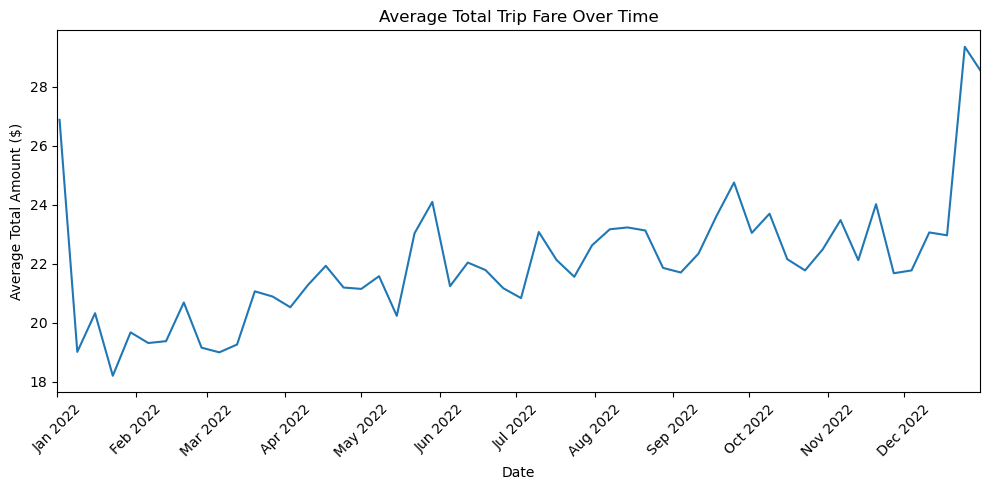

In [31]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Convert 'date' column to datetime
merged_data['date'] = pd.to_datetime(merged_data['date'])

# Set 'date' as the index of the DataFrame
merged_data.set_index('date', inplace=True)

# Assuming you want to plot the weekly average of the 'total_amount'
weekly_avg = merged_data['total_amount'].resample('W').mean()

# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(weekly_avg.index, weekly_avg.values)

# Set the x-axis limits to the min and max dates in your dataset
plt.xlim(merged_data.index.min(), merged_data.index.max())

# Format the x-axis to show dates in a more readable format
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # e.g., "Jan 2022"
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# Rotate date labels for better readability
plt.xticks(rotation=45)

plt.title('Average Total Trip Fare Over Time')
plt.xlabel('Date')
plt.ylabel('Average Total Amount ($)')
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


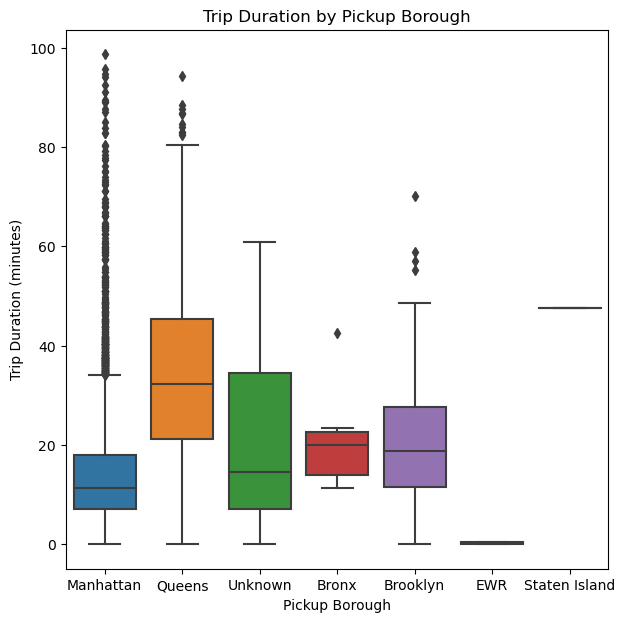

In [32]:
plt.figure(figsize=(7, 7))
sns.boxplot(x='pickup_borough', y='trip_duration', data=merged_data)

plt.title('Trip Duration by Pickup Borough')
plt.xlabel('Pickup Borough')
plt.ylabel('Trip Duration (minutes)')
plt.show()

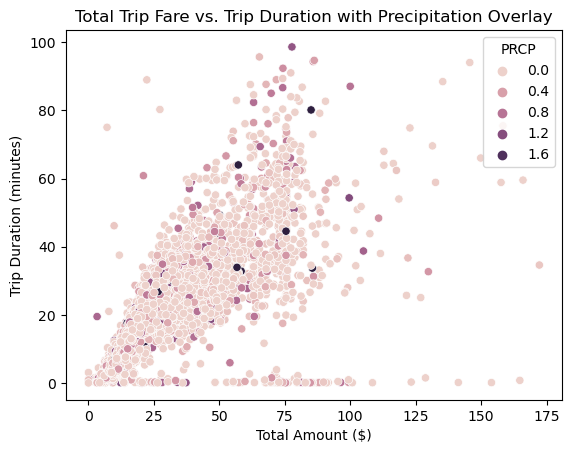

In [33]:
sns.scatterplot(x='total_amount', y='trip_duration', hue='PRCP', data=merged_data)
plt.title('Total Trip Fare vs. Trip Duration with Precipitation Overlay')
plt.xlabel('Total Amount ($)')
plt.ylabel('Trip Duration (minutes)')
plt.show()

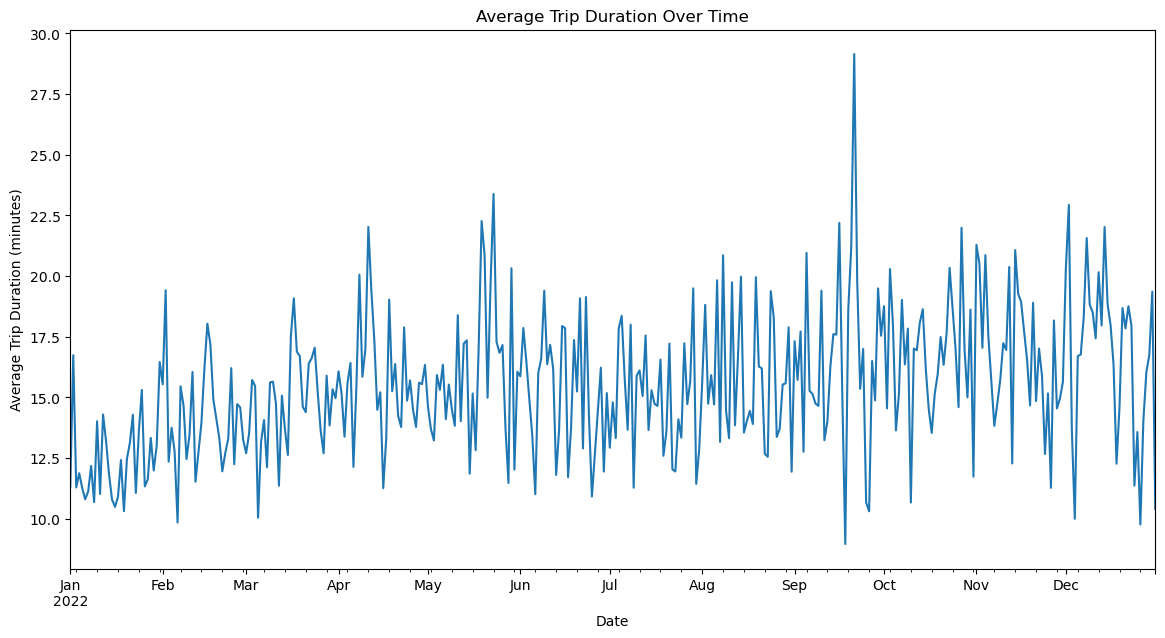

In [42]:
import matplotlib.pyplot as plt
import pandas as pd

merged_data.resample('D')['trip_duration'].mean().plot(kind='line', figsize=(14, 7))

# Add title and labels to the plot
plt.title('Average Trip Duration Over Time')
plt.xlabel('Date')
plt.ylabel('Average Trip Duration (minutes)')

# Display the plot
plt.show()


c:\Users\varun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\varun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


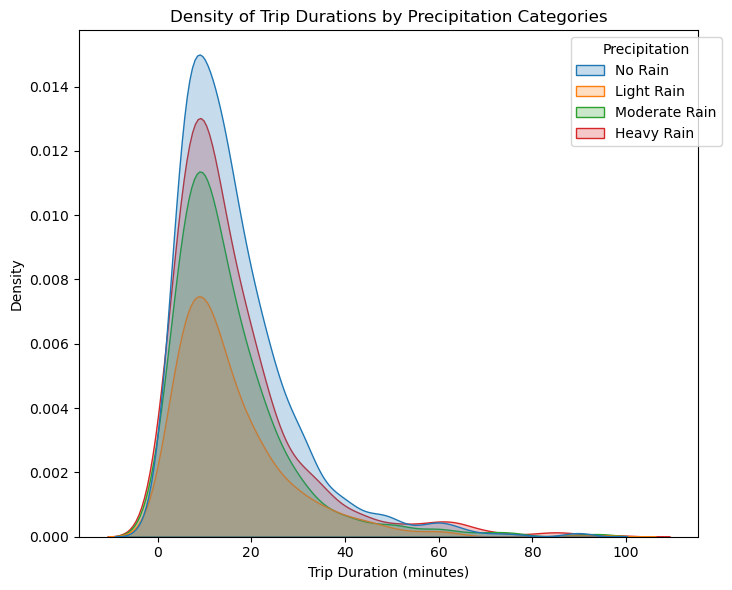

In [35]:
# Define bins for precipitation levels
precipitation_bins = [0, 0.1, 0.25, 0.5, np.inf]
precipitation_labels = ['No Rain', 'Light Rain', 'Moderate Rain', 'Heavy Rain']

# Create a new categorical column in the DataFrame for precipitation categories
merged_data['PRCP_Category'] = pd.cut(merged_data['PRCP'], bins=precipitation_bins, labels=precipitation_labels)

# Plotting the Density Plot with new precipitation categories
plt.figure(figsize=(10, 6))
kdeplot = sns.kdeplot(data=merged_data, x='trip_duration', hue='PRCP_Category', fill=True)
plt.title('Density of Trip Durations by Precipitation Categories')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Density')

# Shrink the legend to fit fewer categories
kdeplot.legend_.set_title('Precipitation')
kdeplot.legend_.set_bbox_to_anchor((1.05, 1))


plt.tight_layout(rect=[0, 0, 0.75, 1])
plt.show()

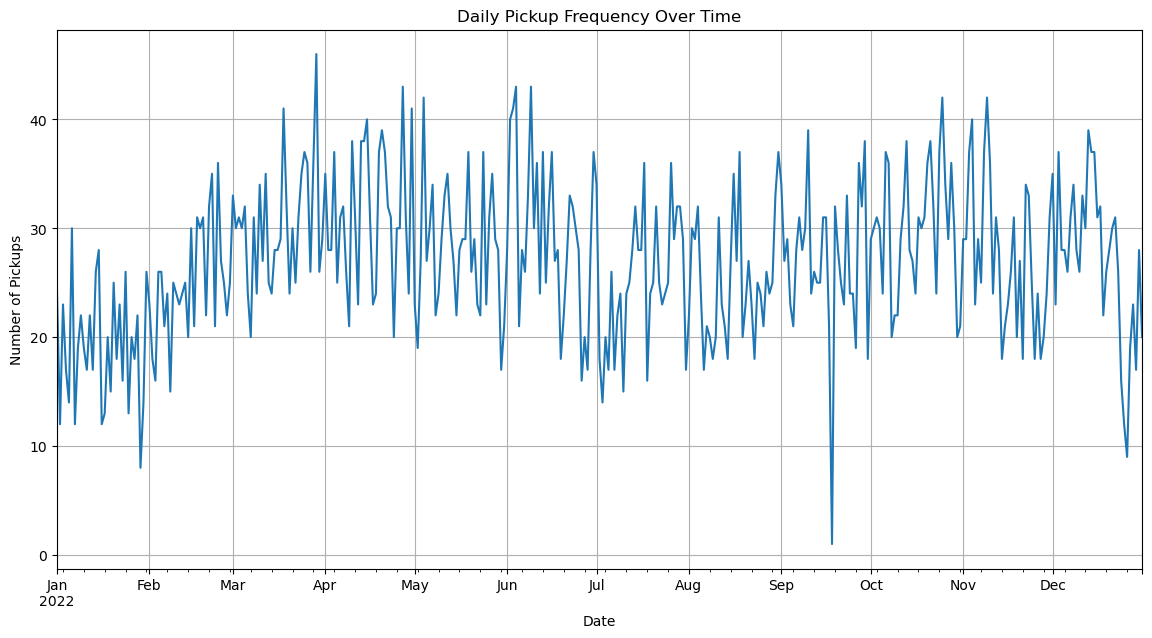

In [43]:
# Then, resample data by day and count the number of trips
daily_pickups = merged_data.resample('D').size()

# Now, create the line plot
plt.figure(figsize=(14, 7))
daily_pickups.plot(kind='line')
plt.title('Daily Pickup Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Pickups')
plt.grid(True)
plt.show()


C:\Users\varun\AppData\Local\Temp\ipykernel_19736\2012022217.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  snowfall_duration_adjusted = merged_data.groupby('snowfall_category')['trip_duration'].mean().reset_index()
c:\Users\varun\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


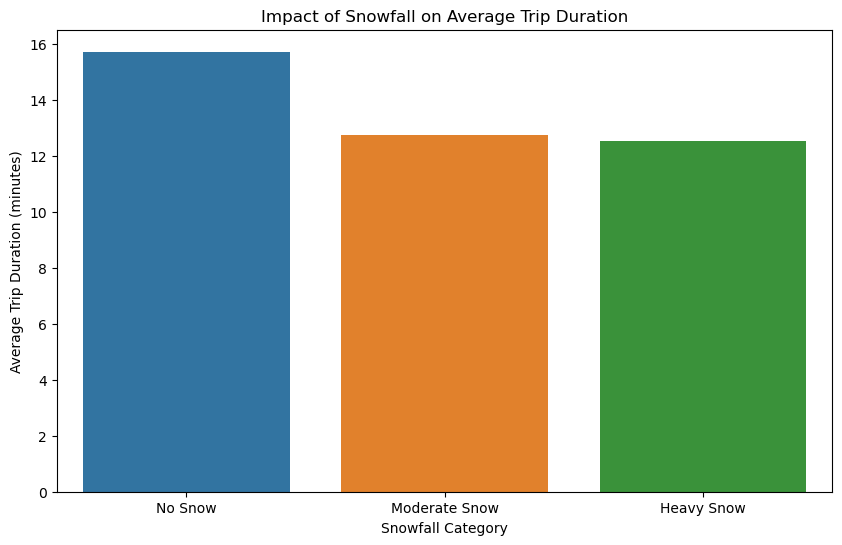

In [37]:
# Adjust bins to exclude 'Light Snow' by changing the bin ranges
bins = [-1, 0, 1, np.inf]  # Adjusted bins to exclude 'Light Snow'
labels = ['No Snow', 'Moderate Snow', 'Heavy Snow']  # Updated labels without 'Light Snow'
merged_data['snowfall_category'] = pd.cut(merged_data['SNOW'], bins=bins, labels=labels)

# Calculate the average trip duration for each snowfall category after adjustment
snowfall_duration_adjusted = merged_data.groupby('snowfall_category')['trip_duration'].mean().reset_index()

# Create the bar plot with adjusted snowfall categories
plt.figure(figsize=(10, 6))
sns.barplot(x='snowfall_category', y='trip_duration', data=snowfall_duration_adjusted)
plt.title('Impact of Snowfall on Average Trip Duration')
plt.xlabel('Snowfall Category')
plt.ylabel('Average Trip Duration (minutes)')
plt.show()

c:\Users\varun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


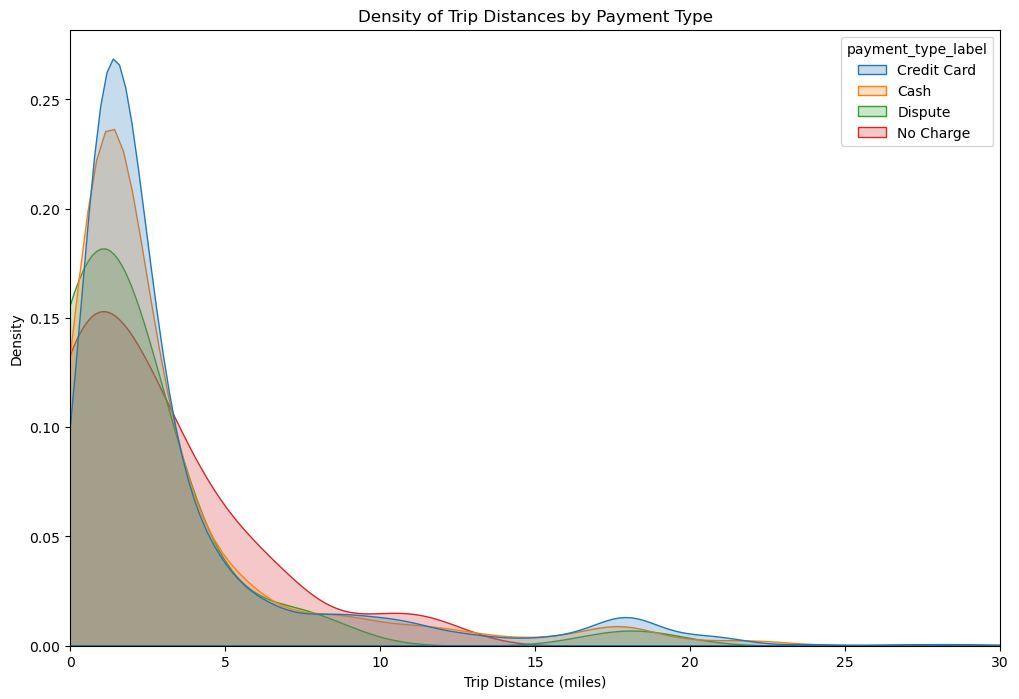

In [38]:
# Assuming 'payment_type' and 'trip_distance' are columns in your merged_data DataFrame
# First, let's ensure the payment_type is categorical with meaningful labels
payment_type_labels = {
    1: 'Credit Card',
    2: 'Cash',
    3: 'No Charge',
    4: 'Dispute',
    5: 'Unknown'
}
# Replace numeric codes with labels in the DataFrame (adjust according to your data)
merged_data['payment_type_label'] = merged_data['payment_type'].map(payment_type_labels)

# Create the density plot
plt.figure(figsize=(12, 8))
sns.kdeplot(data=merged_data, x='trip_distance', hue='payment_type_label', fill=True, common_norm=False)
plt.title('Density of Trip Distances by Payment Type')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Density')
plt.xlim(0, 30)  # Limit x-axis to focus on common trip distances; adjust as needed
plt.show()